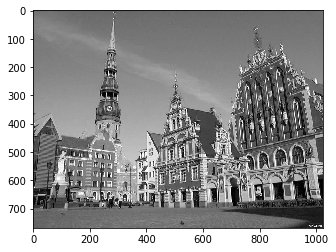

In [2]:
# all in all - how to recognize images
# https://www.learnopencv.com/image-recognition-and-object-detection-part1/

import cv2
import numpy as np
import matplotlib.pyplot as plt

img = cv2.imread('riga.jpg')
img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
plt.imshow(gray, cmap="gray")
plt.show()

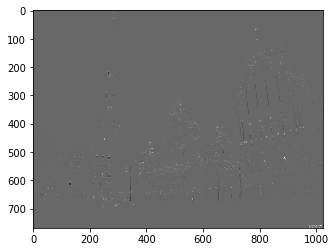

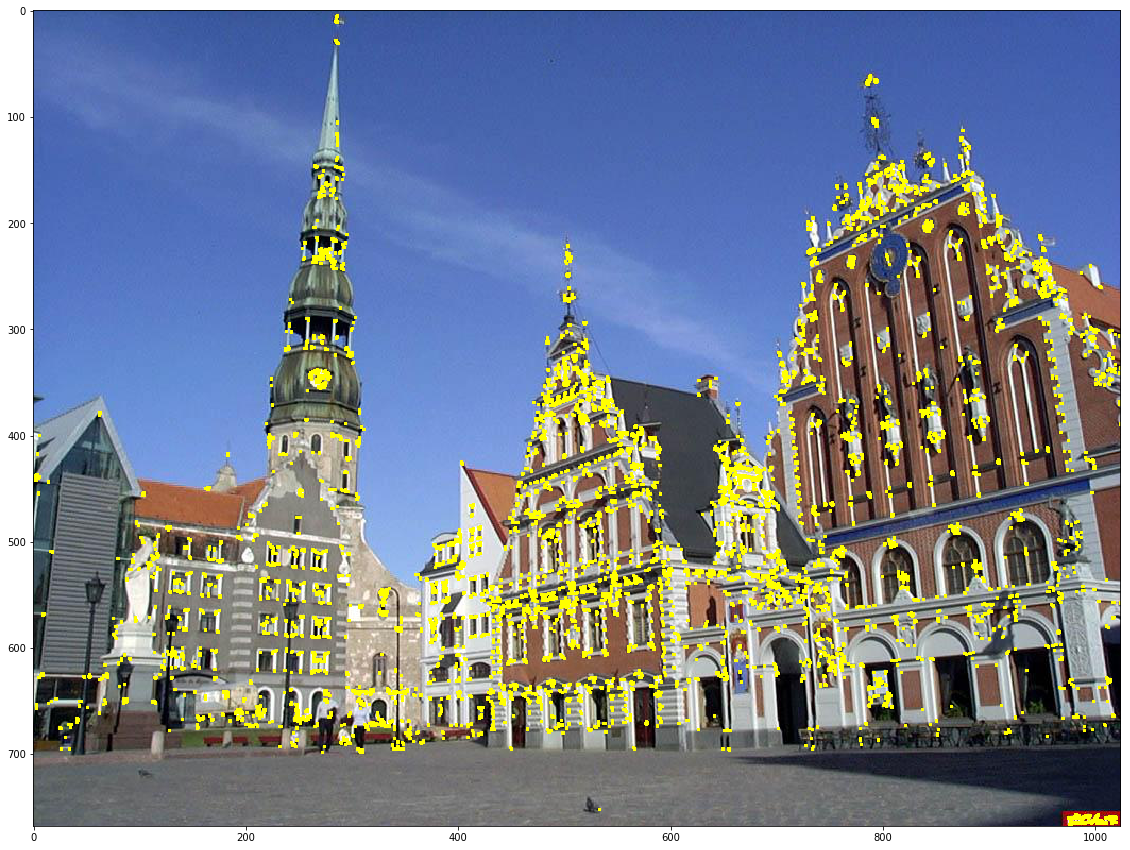

In [3]:
# Harris corner detection
# https://docs.opencv.org/3.0-beta/doc/py_tutorials/py_feature2d/py_features_harris/py_features_harris.html
fgray = np.float32(gray)
# size [of neighbourhood], aperture for derivative, Harris free parameter to tune - bigger - less points detected
dst = cv2.cornerHarris(fgray, 2, 3, 0.1)
# result is dilated (propagated around) for marking the corners
dst = cv2.dilate(dst, None)
# this is the map of "how probable this is the corner"
plt.imshow(dst, cmap="gray", vmin=dst.min(), vmax=dst.max())
plt.show()

# Threshold for an optimal value, it may vary depending on the image.
img_copy = img.copy()
img_copy[dst > 0.01 * dst.max()] = [255, 255, 0]

plt.figure(figsize=(20,15))
plt.imshow(img_copy)
plt.show()

Keypoints number: 7332
Keypoint
  angle: 290.2362365722656
  pyramid layer: 9044735
  strength: 0.03410909324884415
  neighborhood diameter: 2.5646843910217285
  pos: (2.6131691932678223, 444.76226806640625)


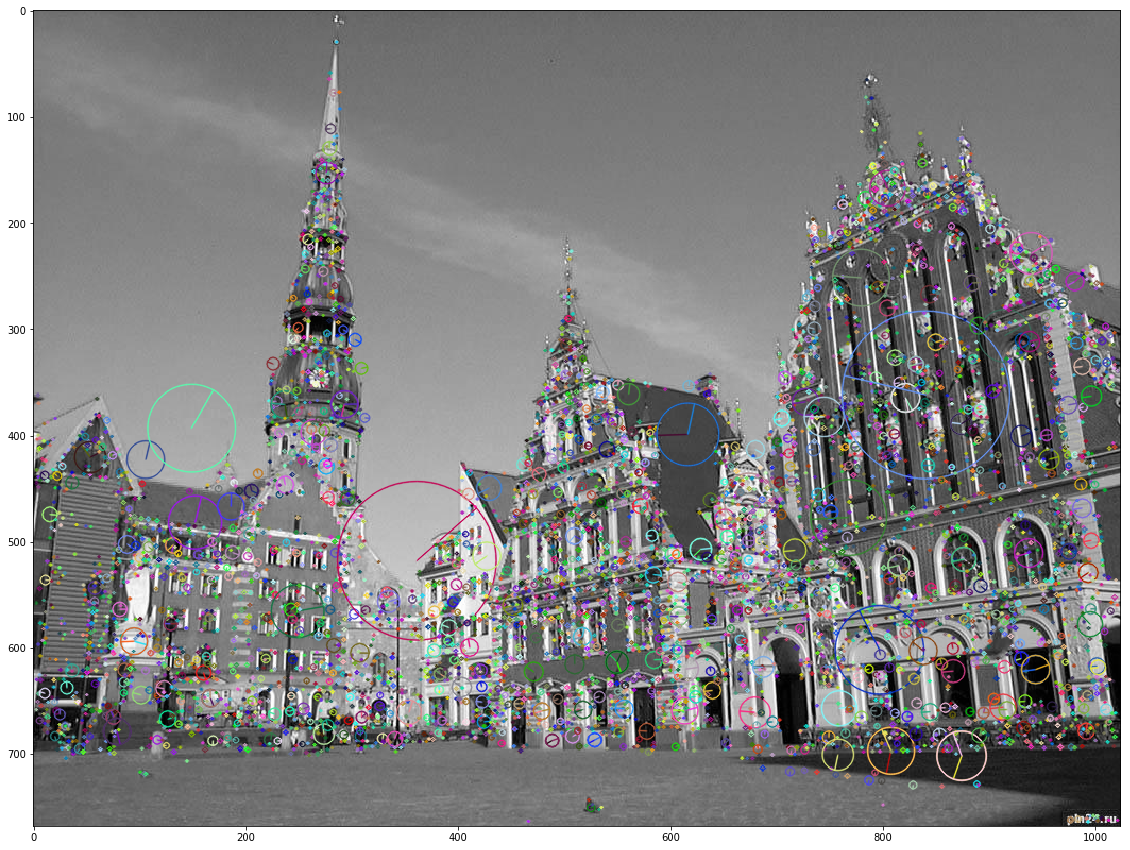

[   6.    5.    5.    8.   26.   48.   30.    9.  152.   23.    1.    3.
   26.   23.    1.    3.  152.   11.    0.    0.    0.    0.    0.    9.
    0.    0.    0.    0.    0.    0.    0.    0.    5.   13.   30.   29.
   21.    9.   25.    5.  152.   12.    1.    9.   24.   17.   40.   24.
  152.   22.    0.    0.    0.    0.    2.   21.    6.    0.    0.    0.
    0.    0.    0.    0.    0.    0.    1.    1.    0.    1.  152.   47.
   53.    1.    1.    1.    1.    3.  152.   82.  152.   11.    1.    0.
    0.    0.   22.   71.   34.    1.    0.    0.    0.    0.    0.    3.
    0.    0.   39.   22.    0.    0.   71.   34.    7.   13.   74.   76.
    4.    2.   52.   16.  152.  121.   32.   15.    1.    0.    6.   11.
   77.   17.    0.    0.    0.    0.    0.    2.]


In [39]:
# SIFT: scale-invariant feature transform
# Uses difference of gaussians to compute gradients
# builds histogram of 36 10-degree bins
# uses maximums to find orientation
# https://docs.opencv.org/3.3.0/da/df5/tutorial_py_sift_intro.html
# This algorithm is patented, so:
# pip install opencv-contrib-python

# GOOD TEXT: http://aishack.in/tutorials/sift-scale-invariant-feature-transform-features/

sift = cv2.xfeatures2d.SIFT_create()
kp = sift.detect(gray, None)
print("Keypoints number:", len(kp))
img2 = cv2.drawKeypoints(gray, kp, img, flags=cv2.DRAW_MATCHES_FLAGS_DRAW_RICH_KEYPOINTS)
k = kp[1]
print("Keypoint\n  angle: {}\n  pyramid layer: {}\n  strength: {}\n  neighborhood diameter: {}\n  pos: {}".format(
    k.angle, k.octave, k.response, k.size, k.pt
))

plt.figure(figsize=(20,15))
plt.imshow(img2)
plt.show()

kp, descriptors = sift.detectAndCompute(gray, None)
k_des = descriptors[0, :]
print (k_des)

In [40]:
# SURF 
# https://docs.opencv.org/3.0-beta/doc/py_tutorials/py_feature2d/py_surf_intro/py_surf_intro.html

In [ ]:
# HOG
# HOG is based on the idea that local object appearance can be effectively described by the distribution ( histogram ) 
# of edge directions ( oriented gradients ).